In [95]:
from dksr.micro_mobility_MDS import * 
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import GeometryCollection


three datasets: trip data (df), a network model NACH (gdf), and a graph containing the bike networks corresponding data like OSMid (G); the network model NACH is based on the graph G

In [71]:
#df = pd.read_json("data.json")

In [72]:
#df = pd.json_normalize(df['sensordata'])

In [73]:
#change in function --> "return df" in micro_mobility_MDS.py
#df = clean_columns(df, inplace=True)

In [74]:
G = ox.graph_from_bbox(50.007215, 49.996002, 8.243716, 8.275259, network_type='bike')

In [76]:
ox.io.save_graph_geopackage(G, filepath="C:\\Users\\LukasKoch\\Desktop\\pipeline\\RouteChoice\\data\\neu\\graph.gpkg")

In [ ]:
gdf_raw = gpd.read_file('joined_graph_NACH_1500_v03.gpkg')

In [83]:
gdf_graph = gpd.read_file("C:\\Users\\LukasKoch\\Desktop\\pipeline\\RouteChoice\\data\\neu\\graph_edges.gpkg")

In [78]:
gdf_NACH = gpd.read_file("C:\\Users\\LukasKoch\\Desktop\\pipeline\\RouteChoice\\data\\neu\\NACH_model.gpkg")

In [104]:
gdf_NACH.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
gdf_graph.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
new_crs = 'EPSG:3857'  
gdf_graph = gdf_graph.to_crs(new_crs)

In [122]:
# Perform spatial join
merged_gdf = gpd.sjoin(gdf_graph, gdf_NACH, how='left', op='intersects')

# Get the matched rows
matched_rows = merged_gdf[gdf_graph.columns]

c:\Users\LukasKoch\anaconda3\envs\dksr_kgl\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [123]:
#merged_gdf = gpd.GeoDataFrame(pd.merge(gdf_graph, gdf_NACH, on='geometry', how='inner'))

In [126]:
merged_gdf

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,...,T1024_Integration_R1500_metric,T1024_Node_Count_R1500_metric,T1024_Total_Depth_R1500_metric,Topological_Choice_R3501_metric,Topological_Choice_SLW_R3501_me,Topological_Mean_Depth_R3501_me,Topological_Mean_Depth_SLW_R350,Topological_Total_Depth_R3501_m,Topological_Total_Length_R3501_,Topological_Total_Nodes_R3501_m
0,529463,30697081,0,"[142939658, 138279268]",True,"['2', '1']",L 422,Saarstraße,secondary,50,...,663.62329,2187.0,7207.3555,208796.0,104953420.0,59.781479,60.281799,292451.0,111787.720,4893.0
0,529463,30697081,0,"[142939658, 138279268]",True,"['2', '1']",L 422,Saarstraße,secondary,50,...,630.34375,1913.0,5805.6719,200798.0,91302872.0,60.040718,60.198452,284593.0,108026.300,4741.0
0,529463,30697081,0,"[142939658, 138279268]",True,"['2', '1']",L 422,Saarstraße,secondary,50,...,546.22479,1611.0,4751.3789,162125.0,78549888.0,61.239479,60.905575,276435.0,102256.760,4515.0
0,529463,30697081,0,"[142939658, 138279268]",True,"['2', '1']",L 422,Saarstraße,secondary,50,...,682.39374,2308.0,7806.1445,211853.0,107305760.0,59.626545,60.103081,294257.0,112727.390,4936.0
0,529463,30697081,0,"[142939658, 138279268]",True,"['2', '1']",L 422,Saarstraße,secondary,50,...,591.08551,1768.0,5288.2773,171198.0,84919592.0,60.443394,60.453548,280820.0,105828.460,4647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,10577183715,10577183736,0,23643769,False,1,,Deutschhausplatz,living_street,,...,355.97150,1515.0,6447.7773,549838.0,192582560.0,46.911327,46.100918,213728.0,99599.172,4557.0
1721,10577183715,10577183736,0,23643769,False,1,,Deutschhausplatz,living_street,,...,321.04028,1428.0,6351.8008,38256.0,26551050.0,46.963116,46.153332,213917.0,99590.297,4556.0
1721,10577183715,10577183736,0,23643769,False,1,,Deutschhausplatz,living_street,,...,319.94336,1414.0,6249.2188,33782.0,25456816.0,47.884811,47.025188,217828.0,99365.820,4550.0
1721,10577183715,10577183736,0,23643769,False,1,,Deutschhausplatz,living_street,,...,318.17578,1390.0,6072.4297,29385.0,24405182.0,48.607906,47.712093,220048.0,98790.672,4528.0


<Axes: >

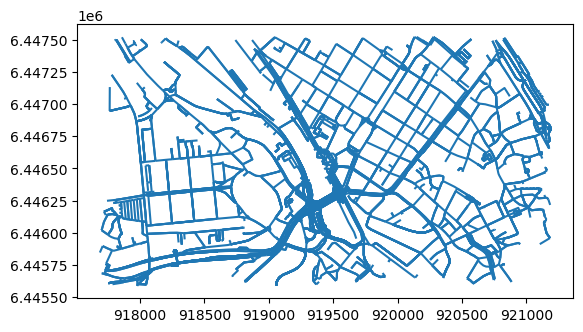

In [125]:
merged_gdf.plot()

## analyzing missing edges 

In [85]:
len(gdf_NACH)

5250

In [ ]:
gdf_raw.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'lanes', 'ref', 'name', 'highway',
       'maxspeed', 'reversed', 'length', 'from', 'to', 'access', 'width',
       'service', 'bridge', 'tunnel', 'junction', 'Depthmap_Ref',
       'Angular_Connectivity', 'Axial_Line_Ref', 'Connectivity', 'NACH',
       'NACH35', 'Segment_Length', 'T1024_Choice_R1500_metric',
       'T1024_Integration_R1500_metric', 'T1024_Node_Count_R1500_metric',
       'T1024_Total_Depth_R1500_metric', 'Topological_Choice_R3501_metric',
       'Topological_Choice_SLW_R3501_me', 'Topological_Mean_Depth_R3501_me',
       'Topological_Mean_Depth_SLW_R350', 'Topological_Total_Depth_R3501_m',
       'Topological_Total_Length_R3501_', 'Topological_Total_Nodes_R3501_m',
       'geometry'],
      dtype='object')

In [8]:
gdf = gdf_raw[['u', 'v','key', 'osmid', 'name', 'length', 'highway', 'maxspeed','NACH', 'geometry']]

In [21]:
gdf_null = gdf.dropna()

In [24]:
gdf_nan_rows = gdf[gdf.isna().any(axis=1)]

<Axes: >

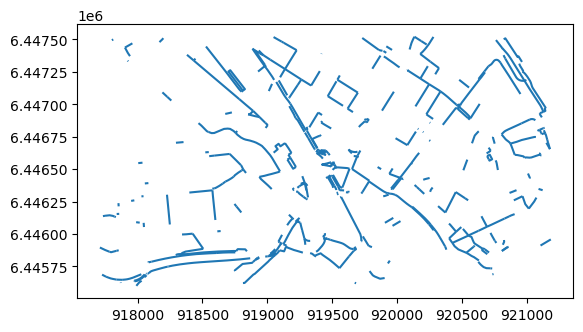

In [25]:
gdf_nan_rows.plot()

<Axes: >

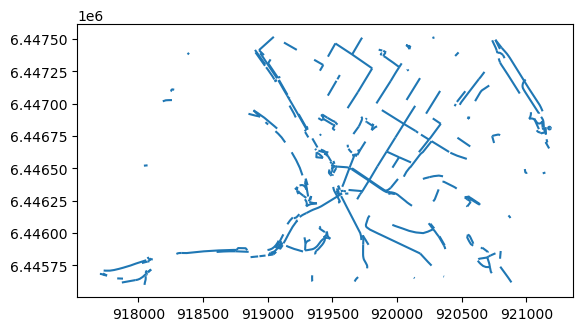

In [56]:
missing_data_1.plot()

<Axes: >

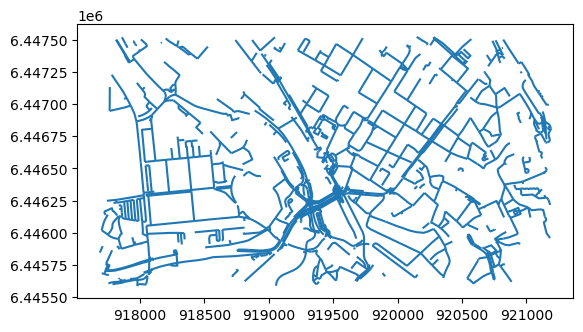

In [57]:
gdf_null.plot()

In [27]:
gdf_null

,u,v,key,osmid,name,length,highway,maxspeed,NACH,geometry
2,5.295710e+05,6.972055e+08,0.0,23658481,Goldenbrunnengasse,6.850,residential,50,1.255273,"LINESTRING (920747.364 6445633.394, 920755.357..."
3,5.295710e+05,2.563257e+08,0.0,1105550437,Weißliliengasse,33.891,tertiary,30,3.748266,"LINESTRING (920742.221 6445691.579, 920755.357..."
4,5.295720e+05,5.295950e+05,0.0,"[202739589, 202739582]",Weißliliengasse,5.681,tertiary,30,4.616885,"LINESTRING (920596.882 6445911.508, 920590.893..."
5,5.295720e+05,5.424622e+09,1.0,562747837,Weißliliengasse,53.989,tertiary,30,4.616885,"LINESTRING (920589.847 6445916.859, 920586.185..."
6,5.295720e+05,5.424622e+09,0.0,562747836,Weißliliengasse,55.896,tertiary,30,4.616885,"LINESTRING (920548.303 6445987.757, 920547.111..."
...,...,...,...,...,...,...,...,...,...,...
1715,1.014009e+10,1.014009e+10,0.0,939461516,,22.162,path,,5.143948,"LINESTRING (918867.835 6445813.076, 918881.494..."
1716,1.014009e+10,1.014009e+10,0.0,1108265357,,23.562,service,,2.636488,"LINESTRING (918867.835 6445813.076, 918871.809..."
1717,1.014009e+10,1.014009e+10,0.0,1108265357,,5.795,service,,5.102677,"LINESTRING (918866.577 6445822.012, 918867.445..."
1718,1.020974e+10,1.020974e+10,0.0,1116284953,,34.483,service,,5.582980,"LINESTRING (920211.405 6446378.262, 920187.828..."


In [28]:
gdf_null = gdf.dropna()

In [29]:
# even the NACH model is based on the G, many G.edges have NULL values for NACH
gdf.isnull().sum()

u             0
v             0
key           0
osmid         0
name          0
length        0
highway       0
maxspeed      0
NACH        482
geometry      0
dtype: int64

In [30]:
# NACH seems to be relative broad distributed with std = 1.65
gdf.describe()

,u,v,key,length,NACH
count,1.720000e+03,1.720000e+03,1720.000000,1720.000000,1238.000000
mean,1.389843e+09,3.166466e+09,0.013953,44.249303,3.720777
std,1.992908e+09,3.033073e+09,0.155686,49.764693,1.654784
min,5.294630e+05,5.295910e+05,0.000000,0.371000,0.301030
25%,2.244563e+08,1.159242e+09,0.000000,10.346000,3.518119
50%,6.971944e+08,1.833312e+09,0.000000,27.168500,4.254620
75%,1.580813e+09,4.647516e+09,0.000000,63.868000,4.753409
max,1.057718e+10,1.091406e+10,3.000000,494.007000,5.773635


In [31]:
#G.nodes are prvided as floats, which is false
gdf[['u','v','key']] = gdf[['u','v','key']].astype(np.int64)

c:\Users\LukasKoch\anaconda3\envs\dksr_kgl\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
gdf['highway'].unique()

array(['secondary', 'primary', 'residential', 'tertiary', 'path',
       'living_street', 'pedestrian', 'service',
       "['path', 'residential']", "['residential', 'living_street']",
       'tertiary_link', 'cycleway', "['path', 'cycleway']",
       "['residential', 'pedestrian']", "['residential', 'path']",
       'primary_link', "['service', 'pedestrian']",
       "['living_street', 'pedestrian']", "['service', 'path']",
       "['path', 'living_street']", "['service', 'residential']",
       'secondary_link', 'track', "['track', 'path']",
       "['path', 'pedestrian']", "['secondary', 'service']",
       "['service', 'track']", "['service', 'living_street']"],
      dtype=object)

In [33]:
sorted_data = gdf.groupby('highway')['NACH'].mean().sort_values(ascending=False)

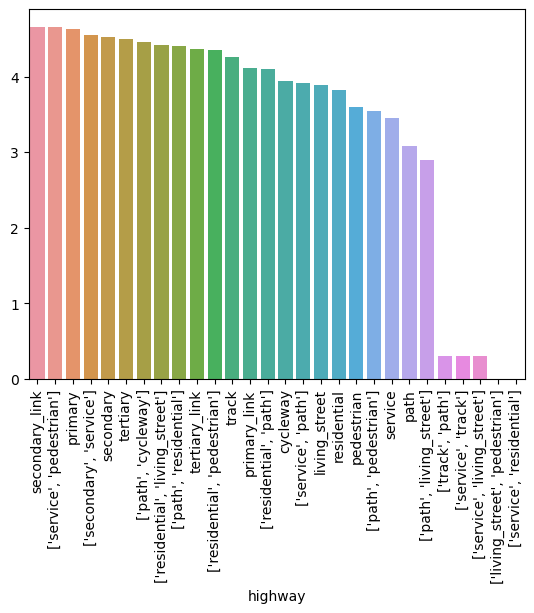

In [34]:
ax = sns.barplot(x=sorted_data.index, y=sorted_data.values)#, x=sorted_data['highway'], y=sorted_data['NACH'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [35]:
sorted_data.index

Index(['secondary_link', '['service', 'pedestrian']', 'primary',
       '['secondary', 'service']', 'secondary', 'tertiary',
       '['path', 'cycleway']', '['residential', 'living_street']',
       '['path', 'residential']', 'tertiary_link',
       '['residential', 'pedestrian']', 'track', 'primary_link',
       '['residential', 'path']', 'cycleway', '['service', 'path']',
       'living_street', 'residential', 'pedestrian', '['path', 'pedestrian']',
       'service', 'path', '['path', 'living_street']', '['track', 'path']',
       '['service', 'track']', '['service', 'living_street']',
       '['living_street', 'pedestrian']', '['service', 'residential']'],
      dtype='object', name='highway')

Text(0.5, 1.0, 'NACH35')

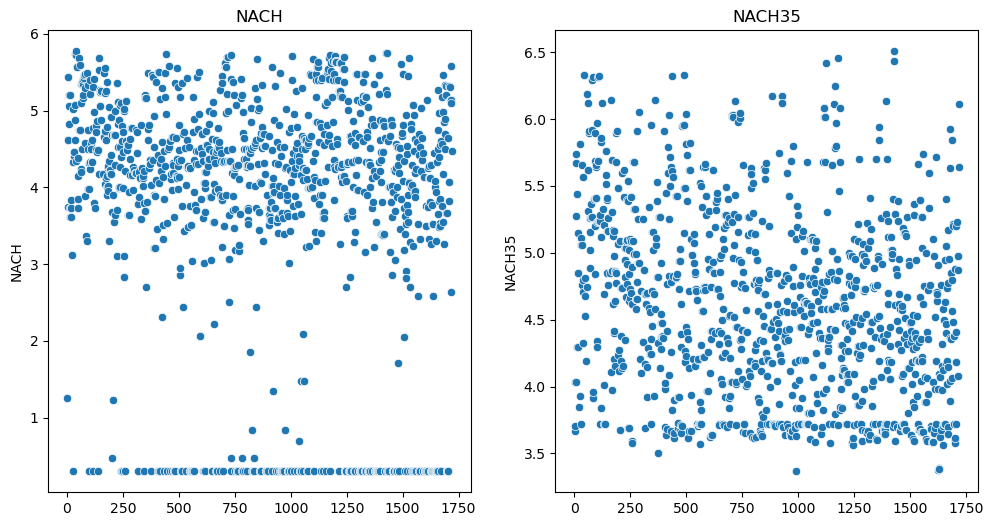

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#  NACH35 is has a radius of 1500 meters and is aligned with the average scooter movment (local perspective)
sns.scatterplot(data=gdf_raw['NACH'], ax=axes[0])
axes[0].set_title('NACH')

# NACH35 is has a radius of 3500 meters and is aligned with to overall map (global perspective)
sns.scatterplot(data=gdf_raw['NACH35'], ax=axes[1])
axes[1].set_title('NACH35')



In [37]:
gdf.head(10)

,u,v,key,osmid,name,length,highway,maxspeed,NACH,geometry
0,529463,30697081,0,"[142939658, 138279268]",Saarstraße,322.921,secondary,50,NaN,"LINESTRING (918605.366 6445853.650, 918550.006..."
1,529463,574492655,0,203848419,Saarstraße,94.856,primary,60,NaN,"LINESTRING (918752.964 6445858.447, 918716.763..."
2,529571,697205542,0,23658481,Goldenbrunnengasse,6.850,residential,50,1.255273,"LINESTRING (920747.364 6445633.394, 920755.357..."
3,529571,256325689,0,1105550437,Weißliliengasse,33.891,tertiary,30,3.748266,"LINESTRING (920742.221 6445691.579, 920755.357..."
4,529572,529595,0,"[202739589, 202739582]",Weißliliengasse,5.681,tertiary,30,4.616885,"LINESTRING (920596.882 6445911.508, 920590.893..."
5,529572,5424621821,1,562747837,Weißliliengasse,53.989,tertiary,30,4.616885,"LINESTRING (920589.847 6445916.859, 920586.185..."
6,529572,5424621821,0,562747836,Weißliliengasse,55.896,tertiary,30,4.616885,"LINESTRING (920548.303 6445987.757, 920547.111..."
7,529583,529591,0,"[200688930, 4614991]",Alicenstraße,223.106,primary,30,5.439374,"LINESTRING (919736.527 6445982.060, 919732.598..."
8,529583,27362740,0,"[958280520, 4614991]",Alicenstraße,45.273,primary,30,4.830781,"LINESTRING (919738.565 6445911.785, 919740.212..."
9,529583,3771859618,0,24489225,Kupferbergterrasse,54.745,residential,30,NaN,"LINESTRING (919780.332 6445908.997, 919766.595..."


In [38]:
gdf['nodes'] = list(zip(gdf['u'], gdf['v'],gdf['key'] ))

c:\Users\LukasKoch\anaconda3\envs\dksr_kgl\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
#a loop for getting the OSMids or other edge data that are represented in the NACH model
# this will be used later to merge scooter counts with the NACH model
osmids = []
for i,x in gdf.iterrows():
    try:
        osmids.append(G.get_edge_data(osmid = G.get_edge_data(gdf.iloc[0]['nodes'][0], gdf.iloc[0]['nodes'][1],gdf.iloc[0]['nodes'][2]).get('osmid')))
    except:
        try:
            osmids.append(G.get_edge_data(gdf.iloc[i]['u'],gdf.iloc[i]['v'], 1).get('osmid'))
        except:
            continue

In [40]:
#a loop for getting the OSMids or other edge data that are represented in the NACH model
# this will be used later to merge scooter counts with the NACH model
osmids = []
for i,x in gdf.iterrows():
    try:
        osmids.append(G.get_edge_data(gdf.iloc[i]['nodes'][0], gdf.iloc[i]['nodes'][1],gdf.iloc[i]['nodes'][2]).get('osmid'))
    except:
        continue

In [41]:
#check missing vallues

# the original G has about 2.7k edges
print("Original G:", len(G.edges))
#the NACH model has only about 1.7k edges
print("NACH Model:", len(gdf.index))
#lastly 1375 can mapped back on the graph, meaning some edges in the NACH model get disturbed during the process
print("Mapped Edges:", len(osmids))

Original G: 2739
NACH Model: 1720
Mapped Edges: 1366


In [42]:
#find all rows that has no corresponding edge data
def missing_data(gdf,G):
    missing_edges = []
    for i, x in gdf.iterrows():
        try:
            G.get_edge_data(gdf.iloc[i]['nodes'][0], gdf.iloc[i]['nodes'][1], gdf.iloc[i]['nodes'][2]).get('osmid')
        except:
            missing_edges.append(i)

    filtered_gdf = gdf.loc[missing_edges]
    return filtered_gdf

In [43]:
missing_data_1 = missing_data(gdf, G)

In [44]:
missing_data_1

,u,v,key,osmid,name,length,highway,maxspeed,NACH,geometry,nodes
1,529463,574492655,0,203848419,Saarstraße,94.856,primary,60,NaN,"LINESTRING (918752.964 6445858.447, 918716.763...","(529463, 574492655, 0)"
5,529572,5424621821,1,562747837,Weißliliengasse,53.989,tertiary,30,4.616885,"LINESTRING (920589.847 6445916.859, 920586.185...","(529572, 5424621821, 1)"
8,529583,27362740,0,"[958280520, 4614991]",Alicenstraße,45.273,primary,30,4.830781,"LINESTRING (919738.565 6445911.785, 919740.212...","(529583, 27362740, 0)"
9,529583,3771859618,0,24489225,Kupferbergterrasse,54.745,residential,30,NaN,"LINESTRING (919780.332 6445908.997, 919766.595...","(529583, 3771859618, 0)"
18,529593,697205546,0,23658217,Eppichmauergasse,9.828,residential,50,3.840984,"LINESTRING (920698.294 6445810.703, 920710.451...","(529593, 697205546, 0)"
...,...,...,...,...,...,...,...,...,...,...,...
1675,8495074089,8495074094,0,914493331,,23.977,cycleway,,4.563066,"LINESTRING (920103.325 6447447.831, 920092.906...","(8495074089, 8495074094, 0)"
1677,8513123713,8513123714,0,916600364,,8.461,cycleway,,5.184183,"LINESTRING (919676.972 6446605.916, 919664.003...","(8513123713, 8513123714, 0)"
1678,8513123714,8513123716,0,"[1103917080, 916600364, 1103917079]",,12.024,cycleway,,3.760649,"LINESTRING (919694.360 6446603.058, 919688.337...","(8513123714, 8513123716, 0)"
1687,8702488586,9949778891,0,939461515,,3.240,cycleway,,4.689646,"LINESTRING (918064.531 6445698.280, 918069.540...","(8702488586, 9949778891, 0)"


<Axes: >

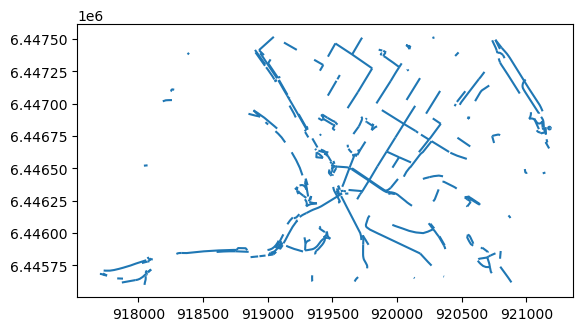

In [45]:
#missing values seem to be highly relevant
missing_data_1.plot()

In [46]:
# during export u, and v seems to be switched

def find_nodes(osmid):
    osmid = 203848419 

    # Iterate over the edges and find the matching edge
    matching_edge = None
    for u, v, key, data in G.edges(keys=True, data=True):
        if "osmid" in data and data["osmid"] == osmid:
            matching_edge = (u, v, key)
            break

    if matching_edge is not None:
        print("Matching edge found!")
        print("u:", matching_edge[0])
        print("v:", matching_edge[1])
        print("key:", matching_edge[2])
    else:
        print("No matching edge found for the given OSM ID.")

In [47]:
find_nodes(203848419)

Matching edge found!
u: 574492655
v: 529463
key: 0


In [48]:
missing_data_1[['u', 'v']] = missing_data_1[['v', 'u']]
missing_data_1['nodes'] = list(zip(missing_data_1['u'], missing_data_1['v'],missing_data_1['key'] ))

In [49]:
edges = []
for i,x in missing_data_1.iterrows():
    try:
        edges.append(G.get_edge_data(missing_data_1.iloc[i]['nodes'][0], missing_data_1.iloc[i]['nodes'][1],missing_data_1.iloc[i]['nodes'][2]))
        edges.append(missing_data_1.iloc[i]['nodes'])
    except:
        continue

In [50]:
#drop all none types
edges = [edge for edge in edges if edge is not None]

In [51]:
edges = edges[1:]

In [52]:
result = {}
for i in range(len(edges)):
    if isinstance(edges[i], dict):
        merged_dict = {**edges[i], 'nodes': edges[i+1]}
        result[i] = merged_dict

In [53]:
result = [v for _, v in result.items()]

In [54]:
gdf_2 = gpd.GeoDataFrame.from_records(result)

In [ ]:
edges_outview = list(G.edges)

In [ ]:
edges_outviewedges_set = set(edges_outview)

In [ ]:
gdf_edges_set = set(zip(gdf['u'], gdf['v']))

In [ ]:
missing_edges = edges_set - gdf_edges_set

In [ ]:
# Extract the routes and their lengths
routes = list(df['route'])
lengths = [nx.shortest_path_length(G, start_node, dropoff_node, weight='length') for start_node, dropoff_node in zip(df['start_node'], df['dropoff_node'])]